# Superficial Vs Deep: Comparing Neuronal Morphology and Electrophysiology in the Human Cortex

## Team Name: Patch Clamp Champs
- Enrique Aranda | A17484190   : 
- Brandon Melendez-Rodriguez | A17433726 : 

## Abstract

This project analyzes a publicly available multimodal dataset from *Large and Fast Human Pyramidal Neurons Associate with Intelligence* (Goriounova et al., 2018) to test whether superficial or deep is associated with differences in neuronal morphology and electrophysiology in the human cortex. Due to the dataset not including specific molecular labels, we operationalized two depth based groups using the dataset’s relative cortical depth variable. Using the threshold of 0.39, we are able to define our superficial and deep cell types.

To measure morphology we compared the total dendritic length provided in the data. We compared the superficial and deep groups to identify their structural complexity. To measure electrophysiology we compared the neuron’s action potential rise speed features and also included the neuron's frequency response measures. We observed that deep neurons showed differences in action potential rise speed and frequency responses while also showing differences in their dendritic length. This suggests that there are measurable differences in the neuronal structure and electrical activity of a neuron depending on where their laminar position is . 


## Research Question

How do the morphological structures (total dendritic length) and the electrophysiological features (action potential rise speed) of pyramidal neurons differ between superficial and deep layers of the human cortex ?

## Background and Prior Work


#### Cortical Depth and Laminar Organization
The human neocortex is described as a six layered structure (layers I-VI) where they are organized from the pial surface down to the white matter. The superficial layers (L2/3) are responsible for the intracortical communication where deep layers (L5/6) are responsible for the outputs to subcortical targets and other brain regions. Due to these reasons, the neurons located in different depths show measurable differences in their morphology and electrophysiology . (Amunts & Zilles, 2015)


#### Why Morphology Matters
Morphology refers to the physical structure of a neuron, specifically the size of a neuron's dendrites (Fan et al. 2024). Dendrites are the processes in which neurons can receive synaptic inputs, allowing morphological features to identify how many inputs a neuron can receive. In this project we are able to use morphology by using total dendritic length to be a measure of dendritic size.

#### Why Electrophysiology Matters
Electrophysiology is the study of the electrical activity in living neurons and the cellular mechanisms that shape how neurons signal. Electrophysiological recordings measure voltage and spike related activities through action potentials (Carter & Shieh, 2010). In our dataset, we are using action potential rise speed and frequency response, this is important to see if there are differences between superficial and cortical layer neurons through their electrophysiological features.

#### Dataset
We analyzed a publicly available dataset from the study *Large and Fast Human Pyramidal Neurons Associate with Intelligence* (Goriunova et al., 2018), where they collected human temporal cortex tissue from neurosurgical patients. The study was conducted to test whether morphological complexity and spike features are related to IQ. We used this data to focus on whether depth defined neuron groups differ in morphology and electrophysiology.

#### How we Define Superficial vs Deep Cell Types
The dataset unfortunately doesn’t provide molecular cell type labels, so to define our cell types we are using relative cortical depth that was given in the dataset. We split the neurons into two different groups, superficial and deep. Superficial is identified as the closer layers towards the pia where deep are the layers closer to the white matter. In our project these are identified by using a threshold split on relative depth: 


>superficial_df = df[df['relative_cortical_depth'] < .39]
>
>deep_df = df[df['relative_cortical_depth'] >= .39]

The treshold of 0.39 was choosen as a split point that seperates the neurons into their designated groups for our sample. This cutoff isnt exact anatomical border between thier layers in the cortical area but we are using this to test whether neurons are *more* superficial or *more* deep within our sample. See Fig. 1 to see visually on how we split our neurons. 


#### References:
(1) Natalia A Goriounova, Djai B Heyer, René Wilbers, Matthijs B Verhoog, Michele Giugliano, Christophe Verbist, Joshua Obermayer, Amber Kerkhofs, Harriët Smeding, Maaike Verberne, Sander Idema, Johannes C Baayen, Anton W Pieneman, Christiaan PJ de Kock, Martin Klein, Huibert D Mansvelder (2018) Large and fast human pyramidal neurons associate with intelligence eLife 7:e41714 https://elifesciences.org/articles/41714 

(2) Fan, Y., Li, Y., Zhong, Y., Hong, L., Li, L., & Li, Y. (2024). Learning meaningful representation of single-neuron morphology via large-scale pre-training. Bioinformatics (Oxford, England), 40(Suppl 2), ii128–ii136. https://academic.oup.com/bioinformatics/article/40/Supplement_2/ii128/7749074?login=false

(3) Carter, M., & Shieh, J. C. (2010). Electrophysiology. In M. Carter & J. C. Shieh (Eds.), Guide to research techniques in neuroscience (pp. 91–118). Academic Press. https://www.sciencedirect.com/science/chapter/monograph/abs/pii/B9780123748492000045?via%3Dihub

(4) Amunts, K., & Zilles, K. (2015). Architectonic mapping of the human brain beyond Brodmann. Neuron, 88(6), 1086–1107. https://pubmed.ncbi.nlm.nih.gov/26687219/





<div style="text-align:center;">
<img src="figure1.jpg" width ="350">

Figure 1. Neocortical lamination from pia to Layers I-IV, ending with white matter (Zilles et al. 2015) with our outline of the neurons we are focusing on. (Superficial in blue, Deep in red)



## Hypothesis


We hypothesize that superficial and deep neurons will differ in both morphology and electrophysiology. By using the database’s relative cortical depth (RCD) to define groups, we predict that deep neurons (RCD >= 0.39) will show a greater morphological difference than superficial neurons (RCD <0.39). Deep neurons will have a higher total dendritic length, where we also hypothesize that deep neurons will show the same for their electrophysiological properties which will be shown in their action potential's rise speed variables.


## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [1]:
#imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('DataTable_Dryad.csv')

/home/bmelendezrodriguez/.local/lib/python3.11/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.9.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Data Wrangling

Describe your data wrangling steps here.

In [2]:
# AI Generated function. since the xslx to csv converter messed up, I asked Gemini for help with a helper function to change the names of the first row to the column name
#  Replace current column names with the values from the first row, then remove that row
new_names = {}
for i, col in enumerate(df.columns):
    val = df.iat[0, i]
    # keep original name if first-row value is missing
    new_names[col] = col if pd.isna(val) else str(val).strip()

df.rename(columns=new_names, inplace=True)

# drop the first row (header row) and reset the index
df = df.drop(df.index[0]).reset_index(drop=True)

# show the updated dataframe head to verify
df.head()

,Patient number,Cell id,'IQ',"'Cortical depth of the cell from pia, um'","'TDL, mm'",'Number of branch points','Relative cortical depth',First AP rise speed,'APriseSpeed All First APs bin1','APriseSpeed 20-40 Hz','APriseSpeed 20-40 Hz relative values',"'Average cortical thickness temporal lobe, mm'","'Cortical Thickness Left, mm'","'Cortical Thickness Right, mm'","'Cortical Thickness resected hemisphere, mm'",Cut-off frequency [Hz],Phase slope [1/ms]
0,1,P001_Cell01M,88,978,14.34,56,0.41,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
1,1,P001_Cell02M,88,1029,15.21,67,0.43,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
2,1,P001_Cell03M,88,1071,16.89,74,0.45,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
3,1,P001_Cell04M,88,1168,19.72,85,0.49,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
4,2,P002_Cell01M,78,616,14.36,55,0.22,NaN,NaN,NaN,NaN,2.73,2.72,2.75,2.75,338.68,17.26


In [3]:
# renaming columns, for standardization and to remove quotation marks from column name
df.rename(columns={"'IQ'": 'iq', "Cell id": 'cell_id', 'Patient number': 'patient_number', "'Cortical depth of the cell from pia, um'": 'cortical_depth_from_pia(um)', "'TDL, mm'": 'tot_dendritic_length'}, inplace=True)
df.rename(columns={"'Number of branch points'":'num_branch_points', "'Relative cortical depth'":'relative_cortical_depth', 'First AP rise speed': 'first_ap_rise_speed', "'APriseSpeed All First APs bin1'": 'ap_rise_speed_all_first_aps_bin1',"'APriseSpeed 20-40 Hz'": 'ap_rise_speed_20-40hz', "'APriseSpeed 20-40 Hz relative values'":'ap_rise_speed_20-40hz_relative', "'Average cortical thickness temporal lobe, mm'":'avg_cortical_thickness_temporal(mm)', "'Cortical Thickness Left, mm'":'cortical_thickness_left(mm)',"'Cortical Thickness Right, mm'":'cortical_thickness_right(mm)', "'Cortical Thickness resected hemisphere, mm'":'cortical_thickness_respected_hemi(mm)', 'Cut-off frequency [Hz]':'cut-off_freq(hz)', 'Phase slope [1/ms]':'phase_slope(1/ms)'}, inplace=True)
len(df['cell_id'].unique())
len(df)

203

In [4]:
num_columns = list(df.columns)
num_columns.remove('cell_id') # not numeric

for i in num_columns: # turn numeric columns to numbers instead of strings to perform computations
    df[i] = pd.to_numeric(df[i], errors='coerce') 
df.head()

,patient_number,cell_id,iq,cortical_depth_from_pia(um),tot_dendritic_length,num_branch_points,relative_cortical_depth,first_ap_rise_speed,ap_rise_speed_all_first_aps_bin1,ap_rise_speed_20-40hz,ap_rise_speed_20-40hz_relative,avg_cortical_thickness_temporal(mm),cortical_thickness_left(mm),cortical_thickness_right(mm),cortical_thickness_respected_hemi(mm),cut-off_freq(hz),Phase slope [1/ms]
0,1.0,P001_Cell01M,88.0,978.0,14.34,56.0,0.41,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
1,1.0,P001_Cell02M,88.0,1029.0,15.21,67.0,0.43,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
2,1.0,P001_Cell03M,88.0,1071.0,16.89,74.0,0.45,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
3,1.0,P001_Cell04M,88.0,1168.0,19.72,85.0,0.49,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
4,2.0,P002_Cell01M,78.0,616.0,14.36,55.0,0.22,NaN,NaN,NaN,NaN,2.73,2.72,2.75,2.75,338.68,17.26


In [5]:
df.to_csv('dryad_fixed.csv')

## Data Analysis & Results

Include cells that describe the steps in your data analysis.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'patient_number'),
  Text(1, 0, 'iq'),
  Text(2, 0, 'cortical_depth_from_pia(um)'),
  Text(3, 0, 'tot_dendritic_length'),
  Text(4, 0, 'num_branch_points'),
  Text(5, 0, 'relative_cortical_depth'),
  Text(6, 0, 'first_ap_rise_speed'),
  Text(7, 0, 'ap_rise_speed_all_first_aps_bin1'),
  Text(8, 0, 'ap_rise_speed_20-40hz'),
  Text(9, 0, 'ap_rise_speed_20-40hz_relative'),
  Text(10, 0, 'avg_cortical_thickness_temporal(mm)'),
  Text(11, 0, 'cortical_thickness_left(mm)'),
  Text(12, 0, 'cortical_thickness_right(mm)'),
  Text(13, 0, 'cortical_thickness_respected_hemi(mm)'),
  Text(14, 0, 'cut-off_freq(hz)'),
  Text(15, 0, 'Phase  slope [1/ms]')])

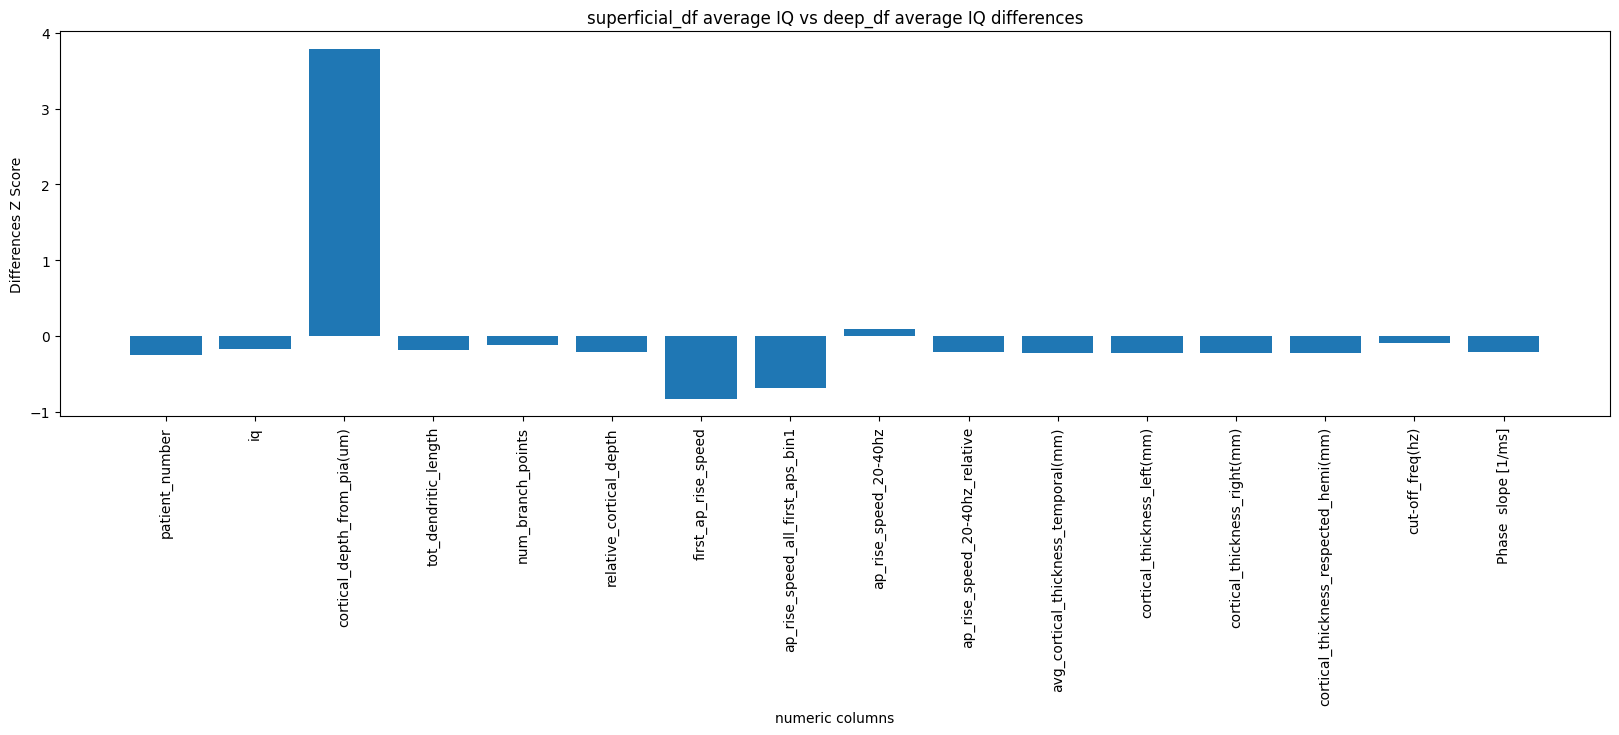

In [6]:
# find any differences between superficial cortical neurons and deep cortical neurons based on the difference function from class
superficial_df = df[df['relative_cortical_depth'] < .39]
deep_df = df[df['relative_cortical_depth'] >= .39]

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
# Set up the figure
fig,ax = plt.subplots(figsize=(20,5))

differences = []
for i in df.columns:
    if i in num_columns:
        superficial_df_mean = superficial_df[i].mean()
        deep_df_mean = deep_df[i].mean()
        differences.append(deep_df_mean-superficial_df_mean)
diff_zscore = stats.zscore(differences)
plt.bar(num_columns, diff_zscore)
plt.xlabel('numeric columns')
plt.ylabel('Differences Z Score')
plt.title('superficial_df average IQ vs deep_df average IQ differences')
plt.xticks(rotation=90)

In [10]:
print(len(deep_df))
print(len(superficial_df))

32
28


Text(0, 0.5, 'Total Dendritic Length (mm)')

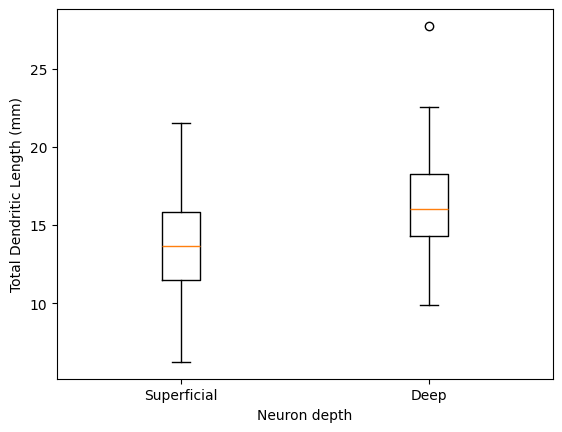

In [11]:
fig, ax = plt.subplots()
superficial_dendritic_length = superficial_df['tot_dendritic_length']
deep_dendritic_length = deep_df['tot_dendritic_length']
data = [superficial_dendritic_length, deep_dendritic_length]
ax.boxplot(data)
plt.xticks([1,2],['Superficial', 'Deep'])
plt.xlabel('Neuron depth')
plt.ylabel('Total Dendritic Length (mm)')

Text(0.5, 1.0, 'ap_rise_speed_all_first_aps_bin1')

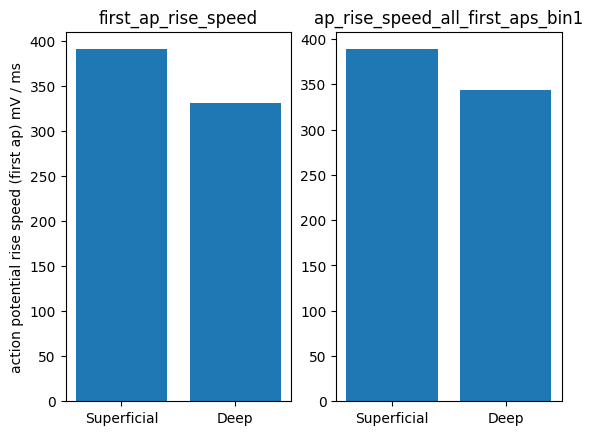

<Figure size 1000x500 with 0 Axes>

In [12]:
fig, axs = plt.subplots(1,2)
plt.figure(figsize=(10,5))
labels = ['Superficial', 'Deep']
ap_columns = ['first_ap_rise_speed', 'ap_rise_speed_all_first_aps_bin1', 'ap_rise_speed_20-40hz', 'ap_rise_speed_20-40hz_relative']
# mean_data = [superficial_df['first_ap_rise_speed'].mean(), deep_df['first_ap_rise_speed'].mean()]
temp_list = []
temp_list.append(superficial_df[ap_columns[0]].mean())
temp_list.append(deep_df[ap_columns[0]].mean())
axs[0].bar(labels, temp_list)
axs[0].set_title('first_ap_rise_speed')
axs[0].set_ylabel('action potential rise speed (first ap) mV / ms')
temp_list= []
temp_list.append(superficial_df[ap_columns[1]].mean())
temp_list.append(deep_df[ap_columns[1]].mean())
axs[1].bar(labels, temp_list)
axs[1].set_title('ap_rise_speed_all_first_aps_bin1')

Text(0.5, 1.0, 'ap_rise_speed_20-40hz_relative')

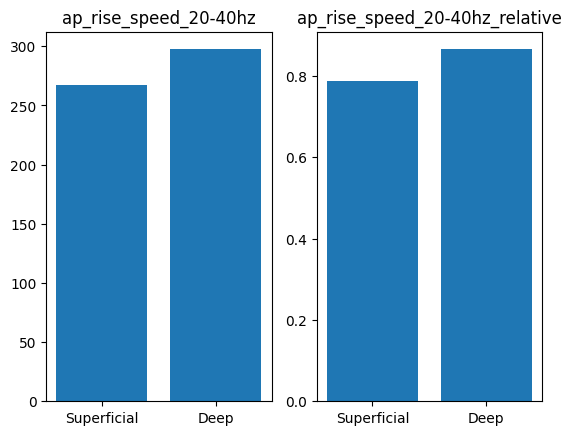

<Figure size 1000x500 with 0 Axes>

In [13]:
fig, axs = plt.subplots(1,2)
plt.figure(figsize=(10,5))
temp_list = []
temp_list.append(superficial_df[ap_columns[2]].mean())
temp_list.append(deep_df[ap_columns[2]].mean())
axs[0].bar(labels, temp_list)
axs[0].set_title(str(ap_columns[2]))

temp_list = []
temp_list.append(superficial_df[ap_columns[3]].mean())
temp_list.append(deep_df[ap_columns[3]].mean())
axs[1].bar(labels, temp_list)
axs[1].set_title(str(ap_columns[3]))

## Conclusion & Discussion

#### Conclusions
In this project, we asked whether depth defined neuronal groups (superficial vs deep) based on relative cortical depth differ in morphology and electrophysiology. Through the multimodal hyman cortical dataset we ...

#### Interpretation 
Why the differnces in morphology and electrophysiology matter is to show that there are differnces between the superficial and deep groups where they serve different roles. These roles can be used to understand more about the neocortex and to be indiviudally find features as to why these groups act in such a way.  


#### Limitations
To begin with limitations, our cell types are being defined by cortical depth rather than molecular labels through our data. While depth is useful for following the laminar organization postion of a group of neurons it isn't completely acurate at specefing if every individual nueron is from that specific group. Secondly, our missing data in electrophysiology columns reduced the sample size which can cause the statostical tests to be reduced in accuracy. Finally, this dataset was from a human neurosurgical tissue, this can cause some variability to our model that we didn't account for.
